In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn 

In [79]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X, y = boston.data, boston.target

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
X_train = X[:int(X.shape[0]*0.75),:]
X_test = X[int(X.shape[0]*0.75):,:]
y_train = y[:int(X.shape[0]*0.75)]
y_test = y[int(X.shape[0]*0.75):]

In [80]:
def write_answer(answer, file_name):
    with open(file_name, "w") as fout:
        fout.write(str(answer))

In [81]:
def L(y,z):
    return z-y
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(algorithms, coefs)]) for x in X]

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
algorithms = np.array([])
coefs = np.array([])
y_cur = np.array(y_train)
for i in np.arange(50):
    model = DecisionTreeRegressor(max_depth=5,random_state=42).fit(X_train,y_cur)
    algorithms = np.append(algorithms,model)
    coefs = np.append(coefs,.9)
    y_cur = L(gbm_predict(X_train),y_train)

error = np.sqrt(mean_squared_error(y_test, gbm_predict(X_test)))
write_answer(error, 'answer_2.txt')
print(error)


23.82317512951577
26.259034263908557
26.502132536976536
26.557698264768568
26.55316683281763
26.56523340701302
26.568875004754986
26.580121412418805
26.568509955837744
26.564804007212615
26.572870172894977
26.572110617148727
26.568194086054106
26.568966403880367
26.571377744387657
26.572538803957098
26.572996639863206
26.568824741186802
26.569659470555234
26.57111166425603
26.57077641857413
26.57034462624947
26.570077722899505
26.57001662999955
26.57031443039434
26.570571415877247
26.570078646017322
26.570291565964776
26.570357167455093
26.570911956603
26.57089702667574
26.570702852938833
26.570530258538163
26.570655111833844
26.57053250027275
26.570591826161262
26.57041661437561
26.570526193245254
26.57056099400743
26.570520827724458
26.570489940925786
26.570546276366276
26.570638898893925
26.57050750930205
26.57057040779843
26.570592575056995
26.570557828276787
26.57053418717254
26.570557875726276
26.570535654233485
5.455565103009407


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
algorithms = np.array([])
coefs = np.array([])
y_cur = np.array(y_train)
for i in np.arange(50):
    model = DecisionTreeRegressor(max_depth=5,random_state=42).fit(X_train,y_cur)
    algorithms = np.append(algorithms,model)
    coefs = np.append(coefs, 0.9/(i+1.0))
    y_cur = L(gbm_predict(X_train),y_train)
    print(np.sqrt(mean_squared_error(y_train,y_cur)))
    
error = np.sqrt(mean_squared_error(y_test, gbm_predict(X_test)))
write_answer(error, 'answer_3.txt')
print(error)


23.82317512951577
25.033188180122064
25.472171527767497
25.709530455844718
25.851621530837303
25.949785838781715
26.02224994228259
26.078905429805555
26.124117738121544
26.160858584933823
26.190994849809638
26.215931831952645
26.237984560339452
26.256370306528343
26.272779937657177
26.286790175849426
26.29955850104019
26.311142495757792
26.321790533706718
26.33108359705761
26.33952991717177
26.348077824740805
26.355150270926494
26.362277283907275
26.368603809500847
26.374056836180312
26.37952607294096
26.38453442003624
26.389388440723142
26.39372844855948
26.398224353049905
26.401837236047704
26.405396116023535
26.408968780740132
26.41218930865943
26.41521953990994
26.417701554033012
26.42044031363287
26.423171162817845


[4.093586271294759, 5.145904997581238, 5.212558694600115]
[3.960015763419649, 4.668636253143994, 4.954380583603177]
[4.1268948841278394, 4.763716604629746, 5.1040453246018975]
[4.0239453938620775, 4.429945274380071, 4.696728059903147]
[3.9941147314001175, 4.504073658599675, 4.971510520720496]
[3.9941147314001175, 4.504073658599675, 4.9444712478374315]


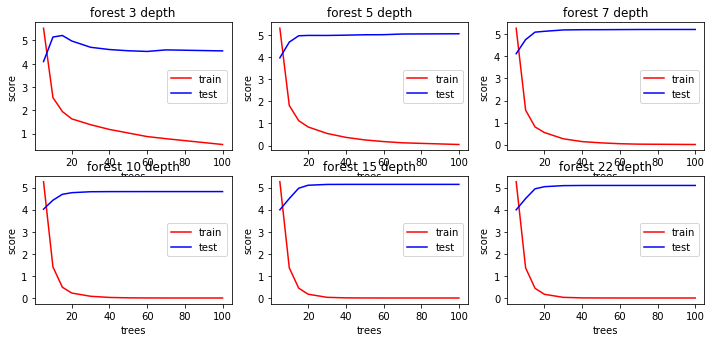

In [75]:
import xgboost
from xgboost import XGBRegressor
trees = np.array([5, 10, 15, 20, 30, 40, 50, 60, 70, 100])
depths = np.array([3, 5, 7, 10, 15, 22])
i=1
plt.figure(figsize=(12,8))
for d in depths:
    scores_train, scores_test = list(), list()
    for num in trees:
        boost = XGBRegressor(n_estimators=num, max_depth=d, random_state=42).fit(X_train, y_train)
        scores_train.append(np.sqrt(mean_squared_error(y_train, boost.predict(X_train))))
        scores_test.append(np.sqrt(mean_squared_error(y_test, boost.predict(X_test))))
    print(scores_test[:3])
    
    ax = plt.subplot(3, 3, i)
    ax.set_title("forest {} depth".format(d))
    plt.plot(trees, scores_train, color="red", label="train")
    plt.plot(trees, scores_test, color="blue", label="test")
    plt.xlabel("trees")
    plt.ylabel("score")
    plt.legend()
    i += 1
write_answer('2 3','answer4.txt')

In [76]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(X_train, y_train)
pred = regr.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, pred))
write_answer(error, 'answer_5.txt')
print(error)

8.254979753549343
